In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,speed,object presence,Delta steer,target
0,43,1,40,0
1,38,1,40,0
2,63,1,10,0
3,24,1,30,0
4,76,1,10,0


In [73]:
train_x,test_x,train_y,test_y=train_test_split(data[['speed','object presence','Delta steer']],data[['target']],train_size=0.85,random_state=True)

In [74]:
train_x,train_y=train_x.values.tolist(),train_y.values.tolist()

In [80]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='relu'),
    tf.keras.layers.Dense(7,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [82]:
history=model.fit(train_x,train_y,epochs=250)

Epoch 1/250
213/213 [==============================] - 1s 1ms/step - loss: 0.8852
Epoch 2/250
213/213 [==============================] - 0s 1ms/step - loss: 0.6699
Epoch 3/250
213/213 [==============================] - 0s 1ms/step - loss: 0.6047
Epoch 4/250
213/213 [==============================] - 0s 1ms/step - loss: 0.5690
Epoch 5/250
213/213 [==============================] - 0s 1ms/step - loss: 0.5509
Epoch 6/250
213/213 [==============================] - 0s 1ms/step - loss: 0.5211
Epoch 7/250
213/213 [==============================] - 0s 1ms/step - loss: 0.4152
Epoch 8/250
213/213 [==============================] - 0s 1ms/step - loss: 0.3392
Epoch 9/250
213/213 [==============================] - 0s 1ms/step - loss: 0.3186
Epoch 10/250
213/213 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 11/250
213/213 [==============================] - 0s 1ms/step - loss: 0.2952
Epoch 12/250
213/213 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 13/250


Text(0, 0.5, 'Loss')

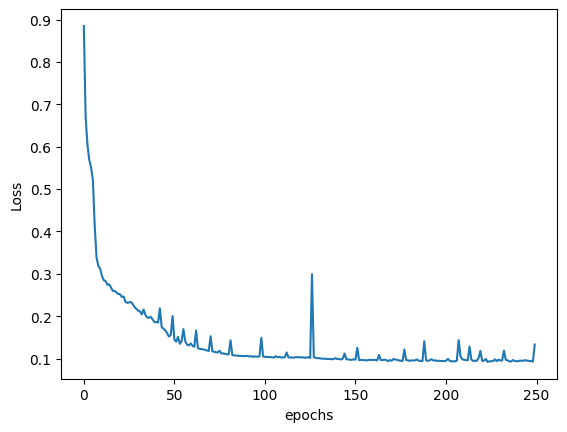

In [84]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')

In [87]:
test_x,test_y=test_x.values.tolist(),test_y.values.tolist()

In [88]:
model.evaluate(test_x,test_y)

38/38 [==============================] - 0s 875us/step - loss: 0.0875


0.08752758055925369

In [85]:
model.weights

[<tf.Variable 'dense_80/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.11247062,  0.15939535,  0.0483462 ],
        [-0.7666934 ,  1.4874074 , -3.834796  ],
        [-0.32742032, -1.193183  ,  0.15211867]], dtype=float32)>,
 <tf.Variable 'dense_80/bias:0' shape=(3,) dtype=float32, numpy=array([0.81923705, 0.68735045, 0.12967366], dtype=float32)>,
 <tf.Variable 'dense_81/kernel:0' shape=(3, 7) dtype=float32, numpy=
 array([[-3.4179344 , -0.5763993 ,  0.35312775, -0.03707772,  0.79012823,
         -0.20087454,  0.32021224],
        [-2.5515635 ,  0.45006815,  0.03792734,  0.72555554,  0.15578637,
          0.12143605,  0.42168012],
        [ 0.6160258 , -0.5913454 , -0.9826508 , -0.49506134,  0.580759  ,
          0.6827274 , -0.55819035]], dtype=float32)>,
 <tf.Variable 'dense_81/bias:0' shape=(7,) dtype=float32, numpy=
 array([-1.5451194 ,  0.59053355,  0.30106106,  0.15229693,  0.45595944,
        -0.76803267,  0.4155744 ], dtype=float32)>,
 <tf.Variable 'dense_82/kernel:0' 

In [86]:
model.save('model.h5')

In [89]:
model.save_weights('model_weights.h5')